# Data Visualisation

## Dataset - College Majors of Recent Graduates

#### Headers for recent-grads.csv are shown below:

#### Header:               Description
#### Rank:	              Rank by median earnings
#### Major_code:	          Major code, FO1DP in ACS PUMS
#### Major:	              Major description
#### Major_category:	      Category of major from Carnevale et al
#### Total:	              Total number of people with major
#### Sample_size:	      Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
#### Men:	              Male graduates
#### Women:	              Female graduates
#### ShareWomen:	          Women as share of total
#### Employed:	          Number employed (ESR == 1 or 2)
#### Full_time:	          Employed 35 hours or more
#### Part_time:	          Employed less than 35 hours
#### Full_time_year_round: Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
#### Unemployed:	          Number unemployed (ESR == 3)
#### Unemployment_rate:	  Unemployed / (Unemployed + Employed)
#### Median:               Median earnings of full-time, year-round workers
#### P25th:	              25th percentile of earnings
#### P75th:	              75th percentile of earnings
#### College_jobs:	      Number with job requiring a college degree
#### Non_college_jobs:	  Number with job not requiring a college degree
#### Low_wage_jobs:	      Number in low-wage service jobs

###  Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

### Importing the dataset

In [2]:
dataset = pd.read_csv('grads.csv')

In [3]:
dataset.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0000,2057.0000,282.0000,Engineering,0.1206,36,1976,1849,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0000,679.0000,77.0000,Engineering,0.1019,7,640,556,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0000,725.0000,131.0000,Engineering,0.1530,3,648,558,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0000,1123.0000,135.0000,Engineering,0.1073,16,758,1069,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0000,21239.0000,11021.0000,Engineering,0.3416,289,25694,23170,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0000,2200.0000,373.0000,Engineering,0.1450,17,1857,2038,264,1449,400,0.1772,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0000,2110.0000,1667.0000,Business,0.4414,51,2912,2924,296,2482,308,0.0957,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0000,832.0000,960.0000,Physical Sciences,0.5357,10,1526,1085,553,827,33,0.0212,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0000,80320.0000,10907.0000,Engineering,0.1196,1029,76442,71298,13101,54639,4650,0.0573,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0000,65511.0000,16016.0000,Engineering,0.1965,631,61928,55450,12695,41413,3895,0.0592,60000,45000,72000,45829,10874,3170


#### Number of rows and columns of the dataset

In [4]:
dataset.shape

(173, 21)

#### Statistics of each column

In [5]:
dataset.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.0000,173.0000,172.0000,172.0000,172.0000,172.0000,173.0000,173.0000,173.0000,173.0000,173.0000,173.0000,173.0000,173.0000,173.0000,173.0000,173.0000,173.0000,173.0000
mean,87.0000,3879.8150,39370.0814,16723.4070,22646.6744,0.5222,356.0809,31192.7630,26029.3064,8832.3988,19694.4277,2416.3295,0.0682,40151.4451,29501.4451,51494.2197,12322.6358,13284.4971,3859.0173
std,50.0849,1687.7531,63483.4910,28122.4335,41057.3307,0.2312,618.3610,50675.0022,42869.6551,14648.1795,33160.9415,4112.8031,0.0303,11470.1818,9166.0052,14906.2797,21299.8689,23789.6554,6944.9986
min,1.0000,1100.0000,124.0000,119.0000,0.0000,0.0000,2.0000,0.0000,111.0000,0.0000,111.0000,0.0000,0.0000,22000.0000,18500.0000,22000.0000,0.0000,0.0000,0.0000
25%,44.0000,2403.0000,4549.7500,2177.5000,1778.2500,0.3360,39.0000,3608.0000,3154.0000,1030.0000,2453.0000,304.0000,0.0503,33000.0000,24000.0000,42000.0000,1675.0000,1591.0000,340.0000
50%,87.0000,3608.0000,15104.0000,5434.0000,8386.5000,0.5340,130.0000,11797.0000,10048.0000,3299.0000,7413.0000,893.0000,0.0680,36000.0000,27000.0000,47000.0000,4390.0000,4595.0000,1231.0000
75%,130.0000,5503.0000,38909.7500,14631.0000,22553.7500,0.7033,338.0000,31433.0000,25147.0000,9948.0000,16891.0000,2393.0000,0.0876,45000.0000,33000.0000,60000.0000,14444.0000,11783.0000,3466.0000
max,173.0000,6403.0000,393735.0000,173809.0000,307087.0000,0.9690,4212.0000,307933.0000,251540.0000,115172.0000,199897.0000,28169.0000,0.1772,110000.0000,95000.0000,125000.0000,151643.0000,148395.0000,48207.0000


#### Dropping unnecessary columns

In [6]:
dataset=dataset.drop(['ShareWomen', 'Sample_size','Full_time_year_round','College_jobs','Non_college_jobs','Low_wage_jobs'], axis = 1)

In [7]:
dataset.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,Employed,Full_time,Part_time,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1,2419,PETROLEUM ENGINEERING,2339.0000,2057.0000,282.0000,Engineering,1976,1849,270,37,0.0184,110000,95000,125000
1,2,2416,MINING AND MINERAL ENGINEERING,756.0000,679.0000,77.0000,Engineering,640,556,170,85,0.1172,75000,55000,90000
2,3,2415,METALLURGICAL ENGINEERING,856.0000,725.0000,131.0000,Engineering,648,558,133,16,0.0241,73000,50000,105000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0000,1123.0000,135.0000,Engineering,758,1069,150,40,0.0501,70000,43000,80000
4,5,2405,CHEMICAL ENGINEERING,32260.0000,21239.0000,11021.0000,Engineering,25694,23170,5180,1672,0.0611,65000,50000,75000
5,6,2418,NUCLEAR ENGINEERING,2573.0000,2200.0000,373.0000,Engineering,1857,2038,264,400,0.1772,65000,50000,102000
6,7,6202,ACTUARIAL SCIENCE,3777.0000,2110.0000,1667.0000,Business,2912,2924,296,308,0.0957,62000,53000,72000
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0000,832.0000,960.0000,Physical Sciences,1526,1085,553,33,0.0212,62000,31500,109000
8,9,2414,MECHANICAL ENGINEERING,91227.0000,80320.0000,10907.0000,Engineering,76442,71298,13101,4650,0.0573,60000,48000,70000
9,10,2408,ELECTRICAL ENGINEERING,81527.0000,65511.0000,16016.0000,Engineering,61928,55450,12695,3895,0.0592,60000,45000,72000


#### Checking for null values

In [8]:
dataset.isnull().sum(axis=0)

Rank                 0
Major_code           0
Major                0
Total                1
Men                  1
Women                1
Major_category       0
Employed             0
Full_time            0
Part_time            0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

#### Dropping null values

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.isnull().sum(axis=0)

Rank                 0
Major_code           0
Major                0
Total                0
Men                  0
Women                0
Major_category       0
Employed             0
Full_time            0
Part_time            0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

#### Datatype of each feature

In [11]:
dataset.dtypes

Rank                 int64  
Major_code           int64  
Major                object 
Total                float64
Men                  float64
Women                float64
Major_category       object 
Employed             int64  
Full_time            int64  
Part_time            int64  
Unemployed           int64  
Unemployment_rate    float64
Median               int64  
P25th                int64  
P75th                int64  
dtype: object

### Data Visualisation

#### Number of people in each Major Category

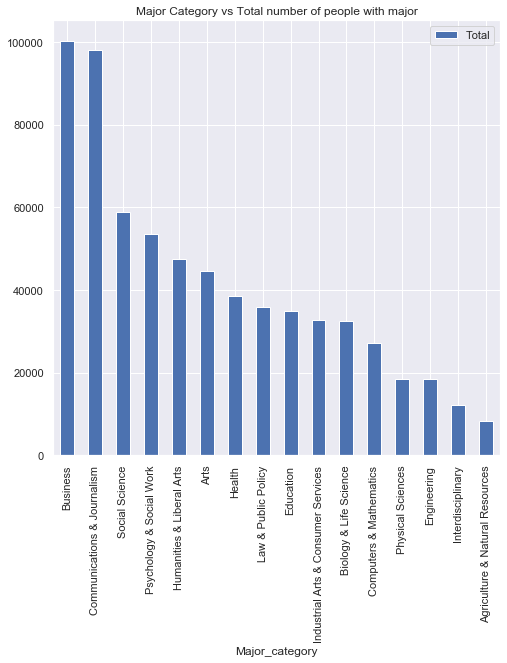

In [12]:
datasetbar = pd.DataFrame(dataset.groupby(['Major_category'])['Total'].mean().sort_values(ascending = False))
datasetbar.plot.bar()
plt.title('Major Category vs Total number of people with major')
plt.show()

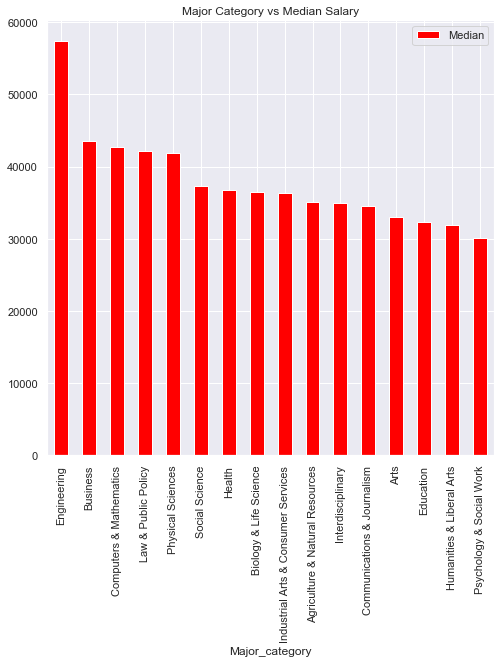

In [13]:
datasetbar = pd.DataFrame(dataset.groupby(['Major_category'])['Median'].mean().sort_values(ascending = False))
datasetbar.plot.bar(color='red')
plt.title('Major Category vs Median Salary')
plt.show()

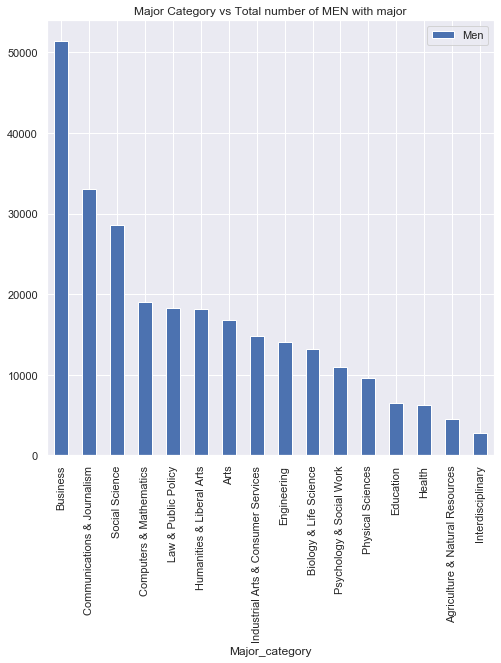

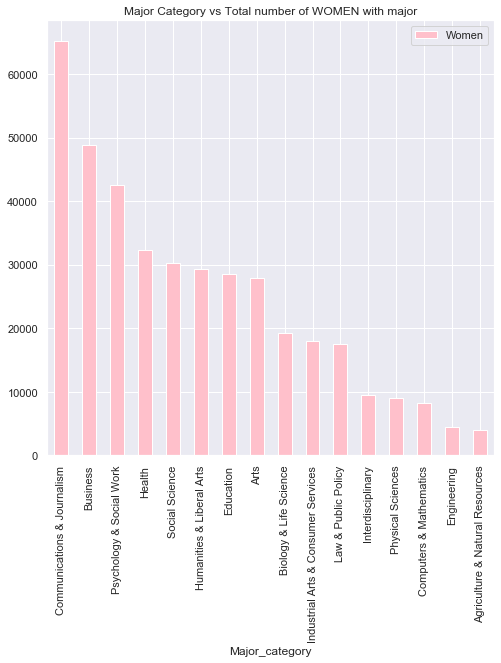

In [14]:
datasetbar1 = pd.DataFrame(dataset.groupby(['Major_category'])['Men'].mean().sort_values(ascending = False))
datasetbar1.plot.bar()
plt.title('Major Category vs Total number of MEN with major')
datasetbar2 = pd.DataFrame(dataset.groupby(['Major_category'])['Women'].mean().sort_values(ascending = False))
datasetbar2.plot.bar(color='pink')
plt.title('Major Category vs Total number of WOMEN with major')
plt.show()


#### From the above visualisation we can see that women mostly work in Communications & Journalism while men mostly work in Business

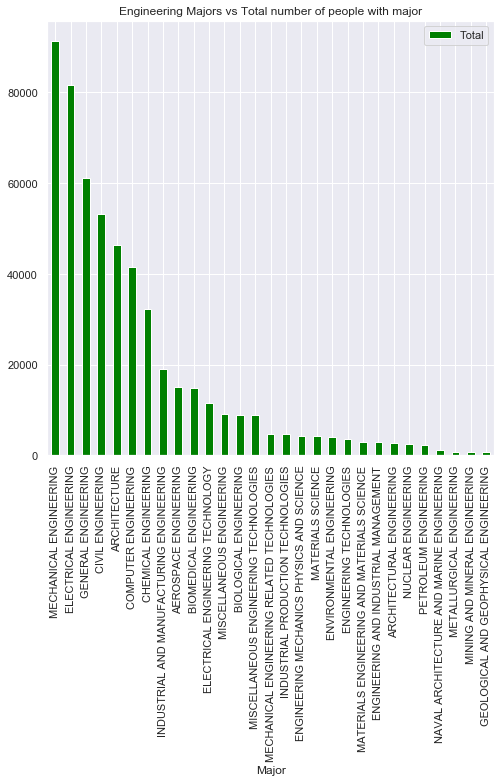

In [15]:
df=dataset.where(dataset['Major_category']=='Engineering')
dfbar = pd.DataFrame(df.groupby(['Major'])['Total'].mean().sort_values(ascending = False))
dfbar.plot.bar(color='green')
plt.title('Engineering Majors vs Total number of people with major')
plt.show()

#### From the above visualisation we can see that in Engineering, people mostly enroll in Mechanical Engineering followed by Electrical and General.

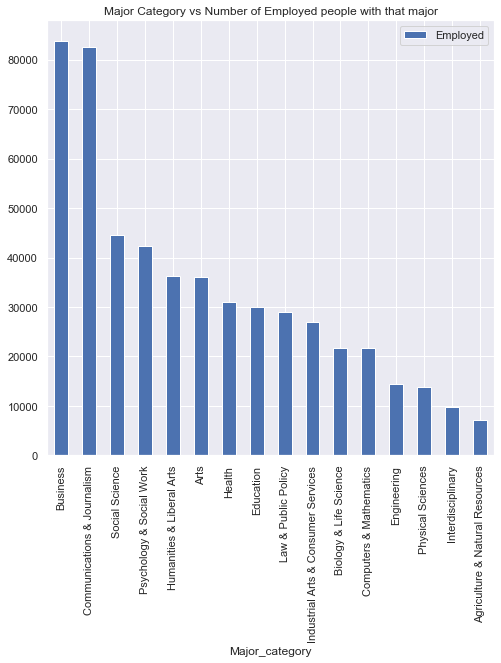

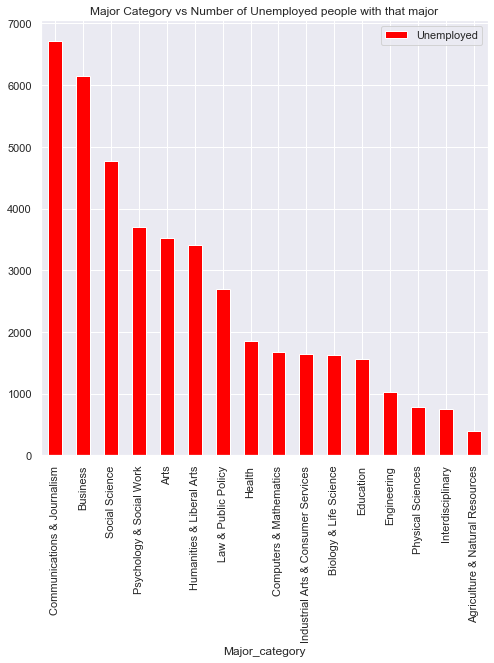

In [20]:
datasetbar = pd.DataFrame(dataset.groupby(['Major_category'])['Employed'].mean().sort_values(ascending = False))
datasetbar.plot.bar()
plt.title('Major Category vs Number of Employed people with that major')
datasetbar = pd.DataFrame(dataset.groupby(['Major_category'])['Unemployed'].mean().sort_values(ascending = False))
datasetbar.plot.bar(color='red')
plt.title('Major Category vs Number of Unemployed people with that major')
plt.show()


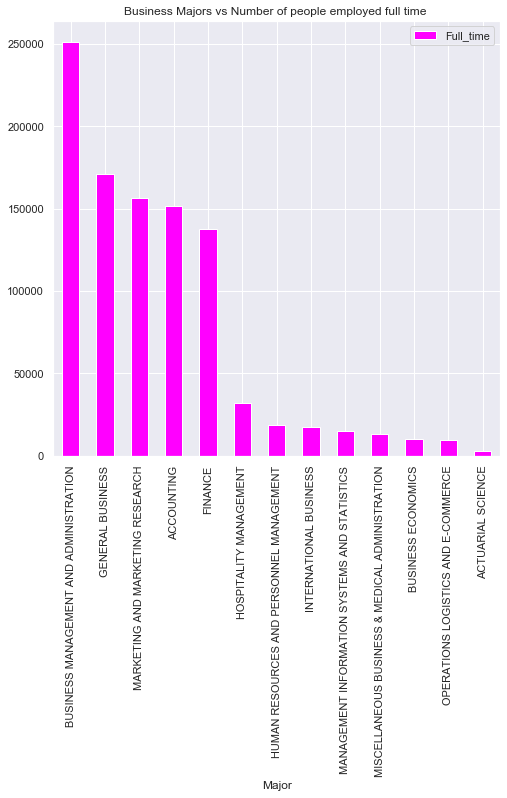

In [18]:
df1=dataset.where(dataset['Major_category']=='Business')
df1bar = pd.DataFrame(df1.groupby(['Major'])['Full_time'].mean().sort_values(ascending = False))
df1bar.plot.bar(color='fuchsia')
plt.title('Business Majors vs Number of people employed full time ')
plt.show()